In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt
import seaborn as sns
import tensorflow as tf


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
df = pd.read_csv("Dataset.csv")
tickers = df.groupby('Ticker')
dates = df.date.unique()
dates = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]

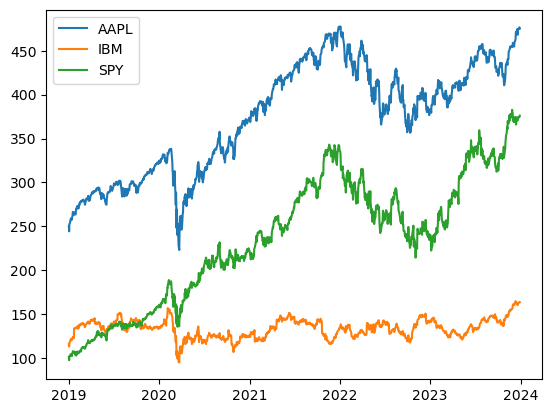

In [5]:
for name, data in tickers:
    plt.plot(dates, data.PRC.values, '-', label = name)
plt.legend()

# Split data

In [6]:

def ts_split(ts, feature_steps=10, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps].flatten() for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps:idx + feature_steps + target_steps][:, -1]
                  for idx in range(n_obs)])
    return X, y
    '''
def ts_split(ts, feature_steps=10, target_steps=1):
    n_obs = len(ts) - feature_steps - target_steps + 1
    X = np.array([ts[idx:idx + feature_steps] for idx in range(n_obs)])
    y = np.array([ts[idx + feature_steps] for idx in range(n_obs)])  # Extract all features as the target
    return X, y
'''

In [9]:
ts = {}
X = {}
y = {}
X_train_full = {}
y_train_full = {}
X_test = {}
y_test = {}
X_train = {}
y_train = {}
X_valid = {}
y_valid = {}
split_ind = {}
split_ind_2 = {}


features = ['PRC']  #features
scalers = {}



In [10]:
from sklearn.preprocessing import MinMaxScaler

# The variables are already defined in CELL INDEX: 6, no need to redefine them
#target = 'PRC'  # Define the target column
def prepare_data_for_training(tickers,features,feature_steps,target_steps):
    ts = {}
    X = {}
    y = {}
    X_train_full = {}
    y_train_full = {}
    X_test = {}
    y_test = {}
    X_train = {}
    y_train = {}
    X_valid = {}
    y_valid = {}
    split_ind = {}
    split_ind_2 = {}
    scalers = {}
    for name, data in tickers:
        data = data[features].dropna()
    #scalers[name] = StandardScaler()   
        scalers[name] = MinMaxScaler()
        data[features] = scalers[name].fit_transform(data[features])
        ts[name] = data[features].values
    
        X[name], y[name] = ts_split(ts[name],feature_steps,target_steps)
        split_ind[name] = int(X[name].shape[0] * 0.8)
        X_train_full[name], y_train_full[name] = X[name][:split_ind[name]], y[name][:split_ind[name]]
        X_test[name], y_test[name] = X[name][split_ind[name]:], y[name][split_ind[name]:]
        split_ind_2[name] = int(X_train_full[name].shape[0] * 0.8)
        X_train[name], y_train[name] = X_train_full[name][:split_ind_2[name]], y_train_full[name][:split_ind_2[name]]
        X_valid[name], y_valid[name] = X_train_full[name][split_ind_2[name]:], y_train_full[name][split_ind_2[name]:]
    return X_train, X_valid, X_test, y_train, y_valid, y_test, scalers



In [13]:
X_train, X_valid, X_test, y_train, y_valid, y_test, scalers = prepare_data_for_training(tickers, features, 10, 1)

In [14]:
X_train_2,X_valid_2, X_test_2, y_train_2, y_valid_2, y_test_2, scalers = prepare_data_for_training(tickers, features,15, 1)

In [15]:
print(y_valid_2['AAPL'].shape)
print(X_train_2['AAPL'].shape)


(199, 1)
(795, 15)


In [9]:
#print(f"Training mean: {X_train['AAPL'].mean()}, Validation mean: {X_valid['AAPL'].mean()}")
#print(f"Training std: {X_train['AAPL'].std()}, Validation std: {X_valid['AAPL'].std()}")


In [ ]:
print(y_valid['AAPL'].shape)

(1,)


In [16]:
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
def simpleRNN_DO(input_shape, output_units):
    model= Sequential()
    model.add(SimpleRNN(units = 64, activation='relu', input_shape = input_shape,return_sequences= True))
    model.add(Dropout(0.2))
    #model.add(BatchNormalization())

    model.add(SimpleRNN(units= 64, activation = 'relu', return_sequences= True))
    model.add(Dropout(0.2))
    #model.add(BatchNormalization())

    model.add(SimpleRNN(units = 64, activation='relu',return_sequences= False))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    #model.add(SimpleRNN(units = 64, activation= 'tanh'))
    

    #model.add(BatchNormalization())
    #model.add(LayerNormalization())
    model.add(Dense(units= output_units))
    return model

In [17]:
def reset_session(seed):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

In [54]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam
#import random
#reset_session(42)
def train_rnn_models(X_t, y_t, X_v, y_v, X_te, y_te):
    models = {}
    histories = {}

    for name in tickers.groups.keys():
    # Determine input shape for the RNN (timesteps, features)
        input_shape = (X_t[name].shape[1], 1)  # Assuming X_train is (samples, timesteps, features)
        output_units = y_t[name].shape[1]   # Determine number of output units
    
    # Build RNN model
        model = simpleRNN_DO(input_shape, output_units)
        model = RNN_model
    #model.add(SimpleRNN(units=50, activation='relu', input_shape=input_shape))
    #model.add(Dropout(0.2))  # Add dropout for regularization
    #model.add(Dense(units=output_units))  # Output layer
        optimizer = Adam(learning_rate=0.0001)
        model.compile(optimizer= optimizer, loss='mean_squared_error')  # Compile the model
    
        y_train_values = y_t[name]  # Keep the y values without reshaping
        y_valid_values = y_v[name]  # Validation y values without reshaping
  
    
    # X_train and X_valid are already correctly shaped for RNN (no need for reshaping here)
        print(f"Training model for ticker: {name}")
    #print(f"X_train shape: {X_train[name].shape}, y_train shape: {y_train_values.shape}")
    #print(f"X_valid shape: {X_valid[name].shape}, y_valid shape: {y_valid_values.shape}")
        early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                min_delta=0.01,
                                                restore_best_weights=True)
    # Ensure X and y have matching number of samples
        if len(X_t[name]) == len(y_train_values):
            history = model.fit(X_t[name], y_train_values, epochs=100, batch_size=32,
                            validation_data=(X_v[name], y_valid_values),
                            callbacks=[early_stopping_cb], verbose=0)
            models[name] = model
            histories[name] = history
            model.save(f'simpleRNN_model_{name}.h5') # Save the model
    
        
        
        # Plotting loss curves
            plt.figure()
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.title(f"{name} Model Loss Curve")
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()
            plt.show()
        test_loss = model.evaluate(X_te[name], y_te[name], verbose=0)
    
        print(f"Test loss for {name}: {test_loss}")
    return models 




Training model for ticker: AAPL


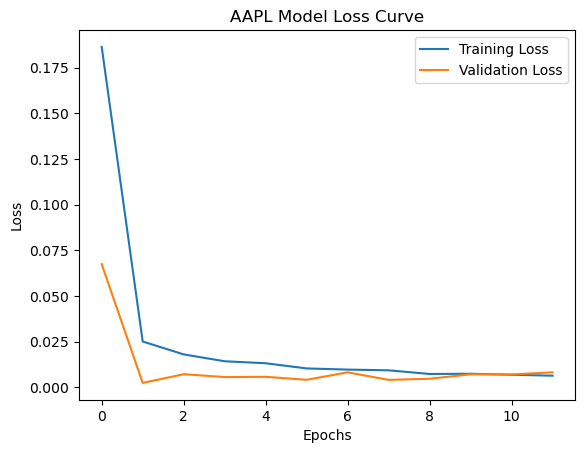

Test loss for AAPL: 0.0006878292770124972
Training model for ticker: IBM


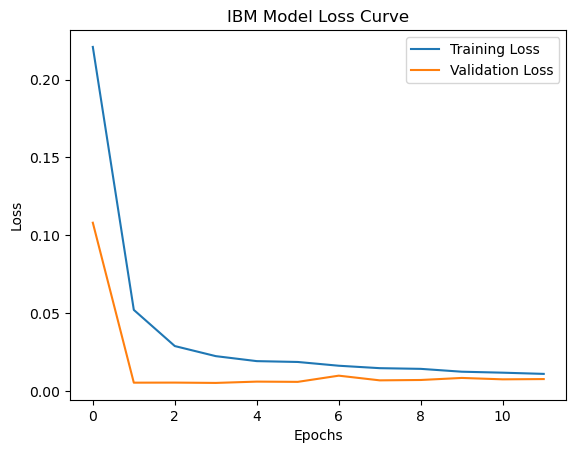

Test loss for IBM: 0.0034432674292474985
Training model for ticker: SPY


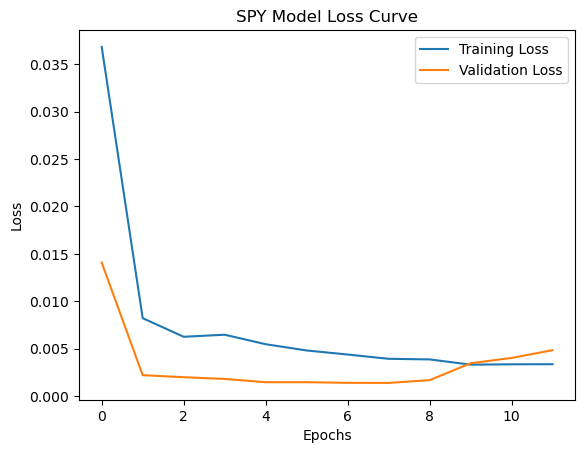

Test loss for SPY: 0.004831588827073574


In [31]:
reset_session(42)
models= train_rnn_models(X_train, y_train, X_valid, y_valid, X_test, y_test)

In [42]:
print(y_valid['AAPL'].shape)
print(X_valid['AAPL'].shape)

(200, 1)
(200, 10)


In [39]:
for name in tickers.groups.keys():
    print(f"Shape of X_train[name]: {X_train[name].shape}")


Shape of X_train[name]: (798, 10)
Shape of X_train[name]: (798, 10)
Shape of X_train[name]: (798, 10)


Training model for ticker: AAPL


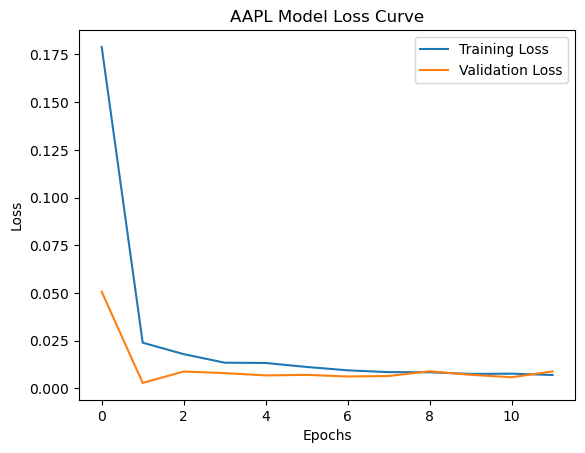

Test loss for AAPL: 0.0039871386252343655
Training model for ticker: IBM


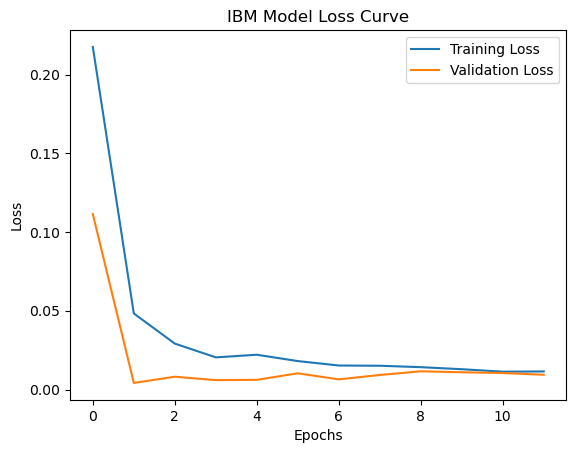

Test loss for IBM: 0.002833909820765257
Training model for ticker: SPY


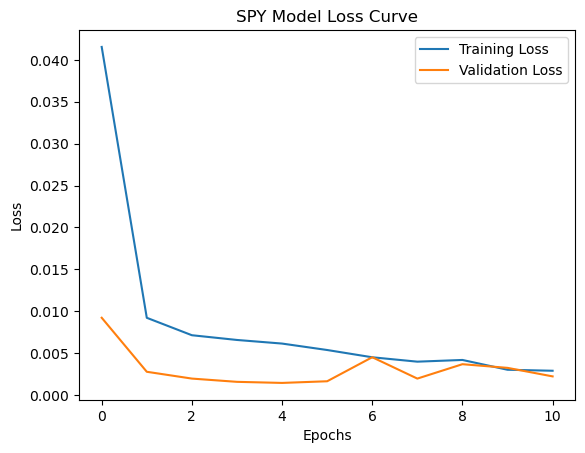

Test loss for SPY: 0.00573655404150486


In [47]:
reset_session(42)
models_2 = train_rnn_models(X_train_2, y_train_2, X_valid_2, y_valid_2, X_test_2, y_test_2)

In [59]:
from sklearn.metrics import mean_squared_error

# Plotting the model's prediction on the test set for each ticker

def calculate_mse_for_models(models,X_t, y_t, X_te, y_te, X_va, y_va):
    for name, model in models.items():
        X_test_values = X_te[name]  # Use the correctly shaped X_test values

        y_test_values = y_te[name]
        y_pred = model.predict(X_test_values)
        y_pred_valid = model.predict(X_va[name])
        y_pred_train = model.predict(X_t[name])
    
    
    

    # Adjust for single or multiple output features
    #y_test_values = y_test_values.reshape(-1, 1) if len(y_test_values.shape) == 1 else y_test_values
    #y_pred = y_pred.reshape(-1, 1) if len(y_pred.shape) == 1 else y_pred
    
        mse_test = mean_squared_error(y_test_values, y_pred)
        print(f'Ticker_test: {name} - MSE: {mse_test}')
        mse_valid = mean_squared_error(y_va[name], y_pred_valid)
        print(f'Ticker_valid: {name} - MSE: {mse_valid}')
        mse_train = mean_squared_error(y_t[name],y_pred_train)
        print(f'Ticker_train: {name} - MSE : {mse_train}')
    #return mse_test, mse_valid, mse_train


    

    # Plotting actual vs predicted for each feature
    #print(y_test_values.reshape(-1,1).shape)
    #plt.figure(figsize=(10, 6))
    #for i, feature in enumerate(features):
        #if y_test_values.shape[1] > i:  # Ensure index is within bounds
            #plt.plot(range(len(y_test_values)), y_test_values[:, i], label=f'Actual {feature}', linestyle='-', marker='o')
            #plt.plot(range(len(y_pred)), y_pred[:, i], label=f'Predicted {feature}', linestyle='-', marker='x')
    #plt.title(f'Ticker: {name} - Actual vs Predicted on Test Set')
    #plt.xlabel('Time Step')
    #plt.ylabel('Values (scaled)')
    #plt.legend()
    #plt.show()

In [60]:
calculate_mse_for_models(models,X_train, y_train, X_test, y_test, X_valid, y_valid)

25/25 [==============================] - 0s 3ms/step
Ticker_test: AAPL - MSE: 0.0006878293383919012
Ticker_valid: AAPL - MSE: 0.0024755086558351253
Ticker_train: AAPL - MSE : 0.0023692947225095115
25/25 [==============================] - 0s 3ms/step
Ticker_test: IBM - MSE: 0.003443267517249101
Ticker_valid: IBM - MSE: 0.005238147674235556
Ticker_train: IBM - MSE : 0.006395688969639852
25/25 [==============================] - 0s 3ms/step
Ticker_test: SPY - MSE: 0.004831588641999709
Ticker_valid: SPY - MSE: 0.0022188041774087864
Ticker_train: SPY - MSE : 0.001368521026185084


In [61]:
calculate_mse_for_models(models_2,X_train_2, y_train_2, X_test_2, y_test_2, X_valid_2, y_valid_2)


25/25 [==============================] - 0s 4ms/step
Ticker_test: AAPL - MSE: 0.00398713885851344
Ticker_valid: AAPL - MSE: 0.0028196288713821255
Ticker_train: AAPL - MSE : 0.002364368069593785
25/25 [==============================] - 0s 5ms/step
Ticker_test: IBM - MSE: 0.002833909548481857
Ticker_valid: IBM - MSE: 0.004181751990428513
Ticker_train: IBM - MSE : 0.0055448967283505445
25/25 [==============================] - 0s 4ms/step
Ticker_test: SPY - MSE: 0.005736553822442954
Ticker_valid: SPY - MSE: 0.009221907264208963
Ticker_train: SPY - MSE : 0.00635080282062743


In [51]:
# Loop through each ticker
def plot_ticker_predictions(models, X_test, y_test, scalers):
    for name in tickers.groups.keys():
    # Make predictions for the current ticker
        y_test_values = y_test[name]
        y_pred = models[name].predict(X_test[name])

    # Inverse transform predictions and test values to original scale
        y_test_original = scalers[name].inverse_transform(y_test_values)
        y_pred_original = scalers[name].inverse_transform(y_pred)
        mse = mean_squared_error(y_test_original, y_pred_original)
        print(f'Ticker: {name} - MSE: {mse}')
    # Evaluate on a separate test set if available
   
    #print(f"Test Loss: {test_loss}")


    # Loop through each feature to plot separately
        for i, feature in enumerate(features):
            if y_test_original.shape[1] > i:  # Ensure index is within bounds
                plt.figure(figsize=(10, 6))
                plt.plot(range(len(y_test_original)), y_test_original[:, i], label=f'Actual {feature}', linestyle='-', marker='o')
                plt.plot(range(len(y_pred_original)), y_pred_original[:, i], label=f'Predicted {feature}', linestyle='-', marker='x')
                plt.title(f'Ticker: {name} - Actual vs Predicted for {feature}')
                plt.xlabel('Time Step')
                plt.ylabel('Values (original scale)')
                plt.legend()
                plt.show()




8/8 [==============================] - 0s 3ms/step
Ticker: AAPL - MSE: 44.64197041745842


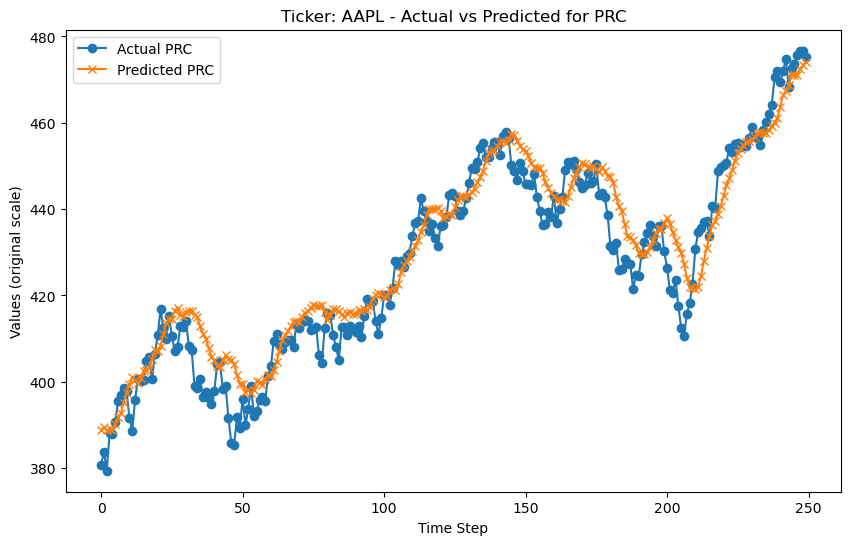

8/8 [==============================] - 0s 3ms/step
Ticker: IBM - MSE: 16.84311151991835


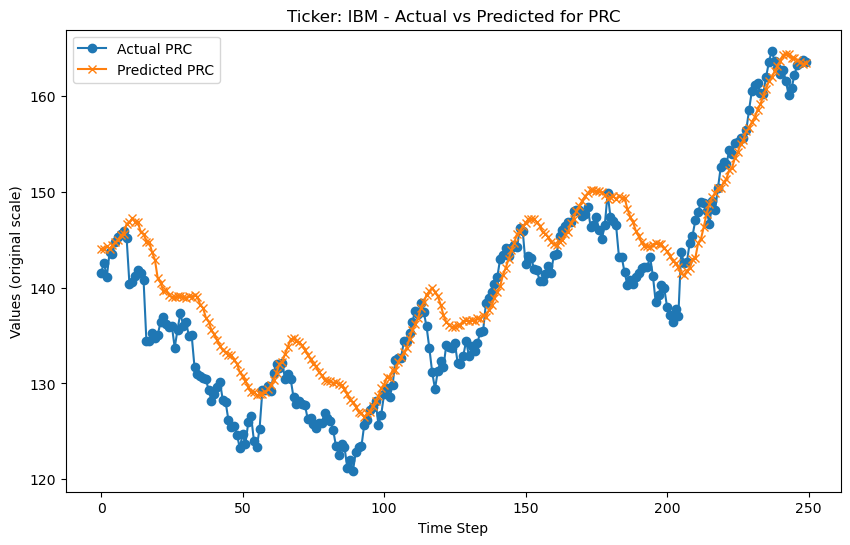

8/8 [==============================] - 0s 4ms/step
Ticker: SPY - MSE: 393.2726520745216


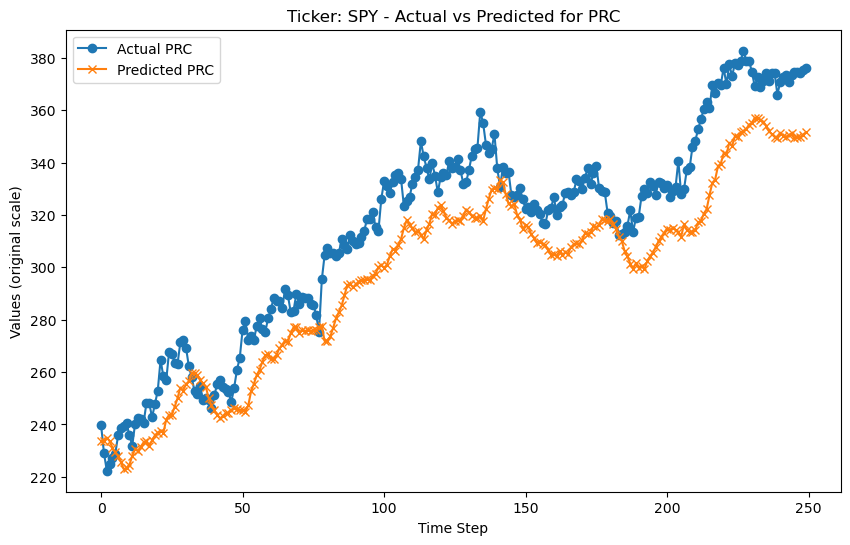

In [52]:
plot_ticker_predictions(models, X_test, y_test, scalers)

8/8 [==============================] - 0s 5ms/step
Ticker: AAPL - MSE: 258.7758043242323


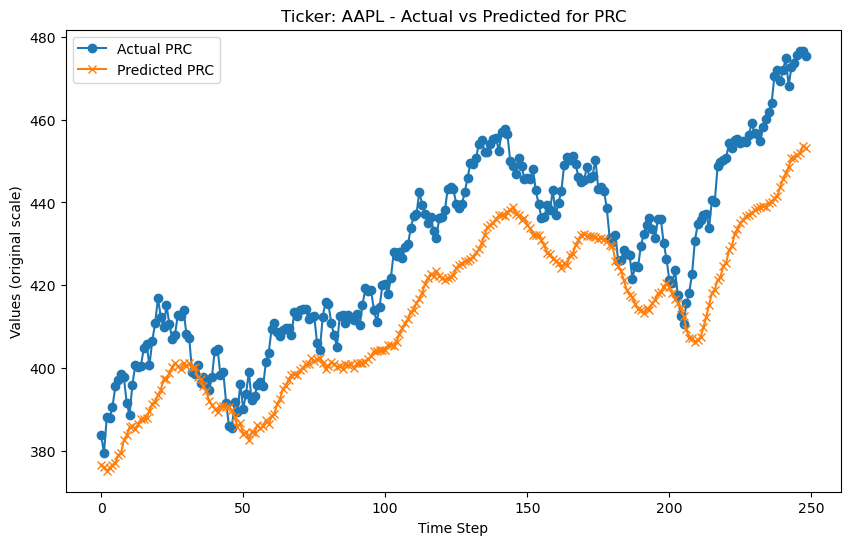

8/8 [==============================] - 0s 7ms/step
Ticker: IBM - MSE: 13.86237290616232


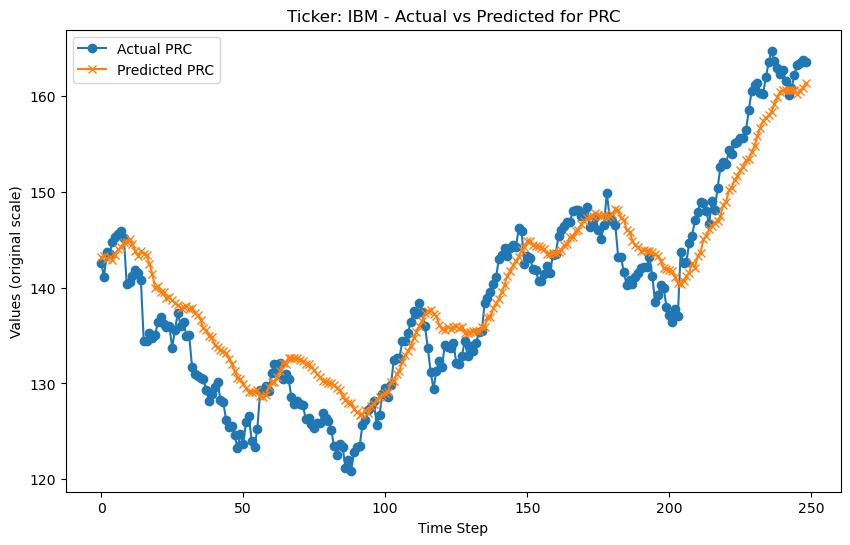

8/8 [==============================] - 0s 5ms/step
Ticker: SPY - MSE: 466.9330823735651


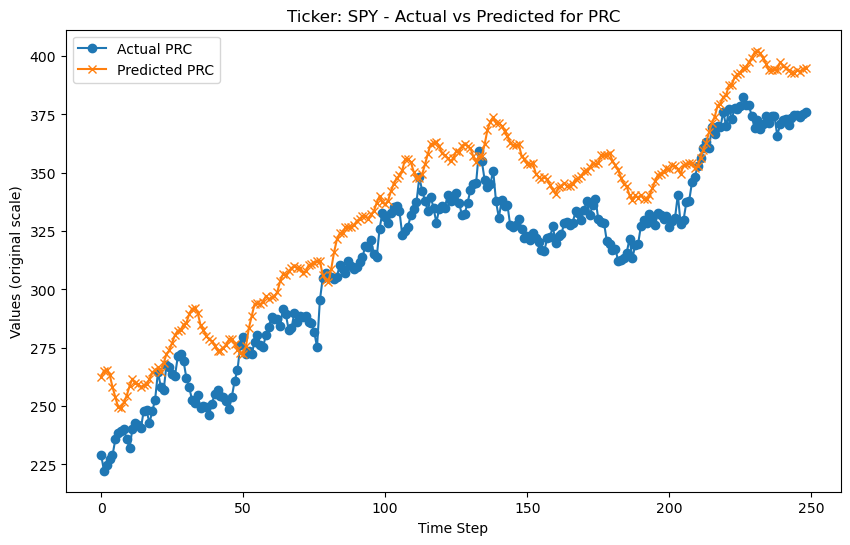

In [53]:
plot_ticker_predictions(models_2, X_test_2, y_test_2, scalers)